<a href="https://colab.research.google.com/github/nathanKiwKiw/PCVK-/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


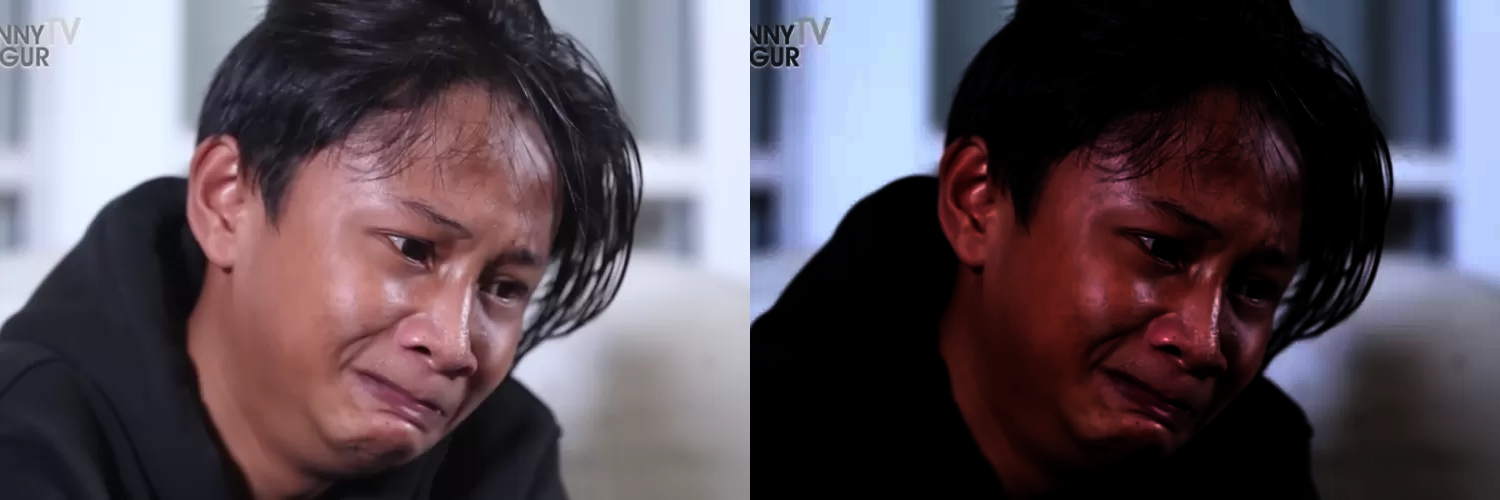

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Gamma Correction pada citra ')
print('----------------------------------')

try:
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

# Membaca gambar
img = cv.imread("drive/MyDrive/PCVK/sijelek.jpg")

# Normalisasi nilai intensitas dari 0-255 ke 0-1
img_gamma = np.power(img/255,gamma) * 255

img_result = cv.hconcat([img, img_gamma.astype(np.uint8)])

cv2_imshow(img_result)


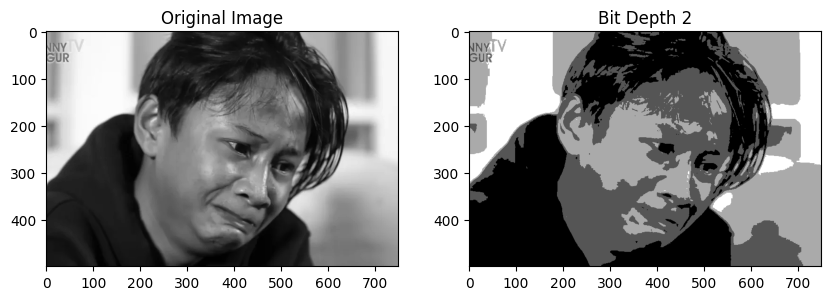

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Nilai kedalaman bit
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
original = cv.imread('drive/MyDrive/PCVK/sijelek.jpg', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

# Menghitung nilai piksel baru berdasarkan kedalaman bit
depth_image = np.round(original / level) * level
depth_image = np.uint8(depth_image)

# Menampilkan gambar asli dan hasil reduksi kedalaman bit
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(depth_image, cmap='gray')
plt.title(f'Bit Depth {bit_depth}')

plt.show()

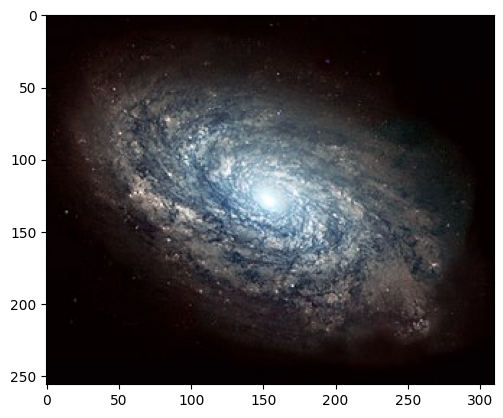

In [24]:
import glob

cv_img = []

for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

galaxy_ori = cv.imread('/content/drive/MyDrive/galaxy.jpg', cv.COLOR_BGR2RGB)
plt.imshow(galaxy_ori)

def pnsr(original, noise):
    mse = np.mean((original - noise) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def average_denoising(images, jumlah_citra):
    sum_image = np.zeros(images[0].shape, dtype=np.float32)
    for i in range(jumlah_citra):
        sum_image = sum_image + images[i]
    average_image = sum_image / jumlah_citra
    return np.clip(average_image, 0, 255).astype(np.uint8)

average_5 = average_denoising(cv_img, 5)
average_10 = average_denoising(cv_img, 10)
average_20 = average_denoising(cv_img, 20)
average_40 = average_denoising(cv_img, 40)
average_80 = average_denoising(cv_img, 80)
average_100 = average_denoising(cv_img, 100)

psnr_5 = pnsr(galaxy_ori, average_5)
psnr_10 = pnsr(galaxy_ori, average_10)
psnr_20 = pnsr(galaxy_ori, average_20)
psnr_40 = pnsr(galaxy_ori, average_40)
psnr_80 = pnsr(galaxy_ori, average_80)
psnr_100 = pnsr(galaxy_ori, average_100)

PSNR Average 5 Image:  27.537541158728892
PSNR Average 10 Image:  27.54706624519615
PSNR Average 20 Image:  27.517924034538687
PSNR Average 40 Image:  27.462846687055556
PSNR Average 80 Image:  27.40224544283609
PSNR Average 100 Image:  27.370931279516654


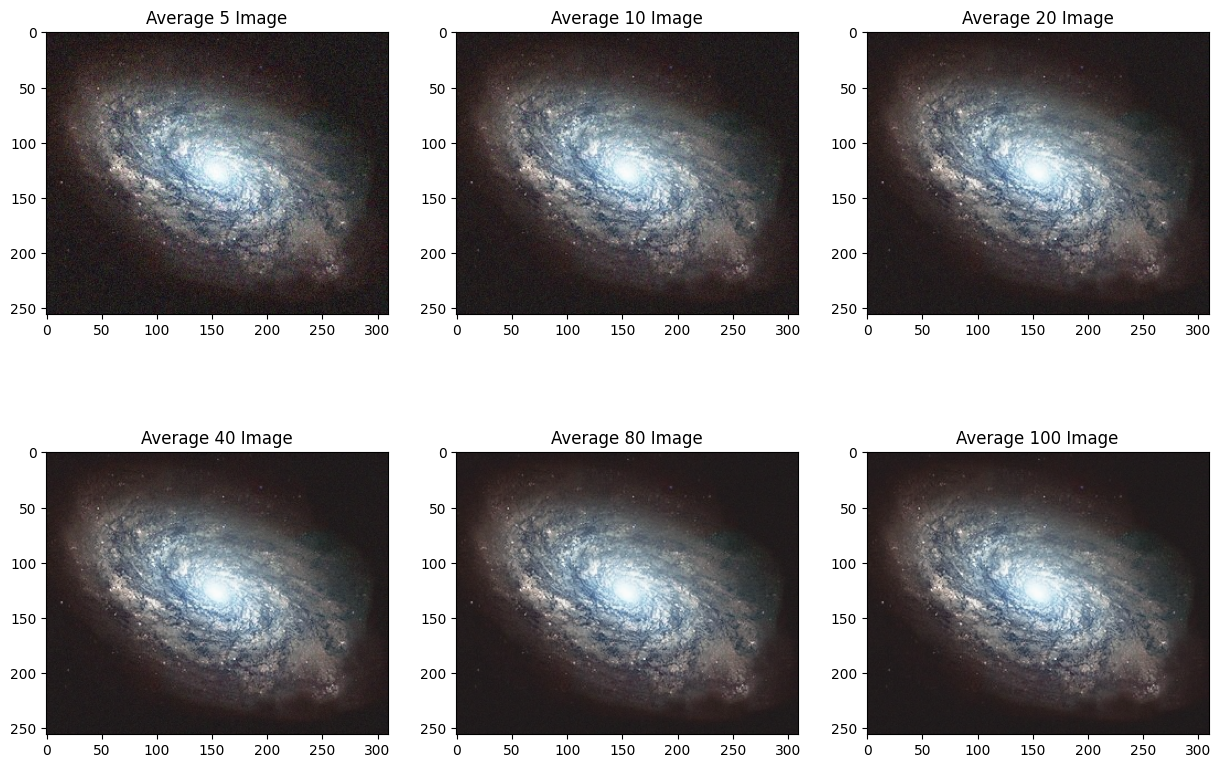

In [25]:
print('PSNR Average 5 Image: ', psnr_5)
print('PSNR Average 10 Image: ', psnr_10)
print('PSNR Average 20 Image: ', psnr_20)
print('PSNR Average 40 Image: ', psnr_40)
print('PSNR Average 80 Image: ', psnr_80)
print('PSNR Average 100 Image: ', psnr_100)

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(average_5)
ax[0, 0].set_title('Average 5 Image')

ax[0, 1].imshow(average_10)
ax[0, 1].set_title('Average 10 Image')

ax[0, 2].imshow(average_20)
ax[0, 2].set_title('Average 20 Image')

ax[1, 0].imshow(average_40)
ax[1, 0].set_title('Average 40 Image')

ax[1, 1].imshow(average_80)
ax[1, 1].set_title('Average 80 Image')

ax[1, 2].imshow(average_100)
ax[1, 2].set_title('Average 100 Image')

plt.show()


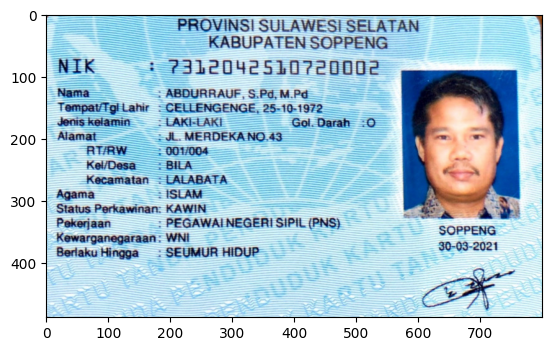

In [11]:
ktp = cv.imread('/content/drive/MyDrive/PCVK/KTP7.jpeg')
ktp = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)
plt.imshow(ktp)

Text(0.5, 1.0, 'Citra Masking')

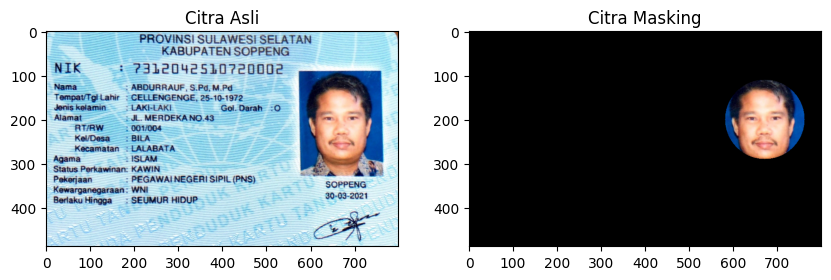

In [13]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 200, -1)
masked_image_face = cv.bitwise_and(ktp, ktp, mask=mask)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(masked_image_face)
ax[1].set_title('Citra Masking')

Text(0.5, 1.0, 'Citra Masking')

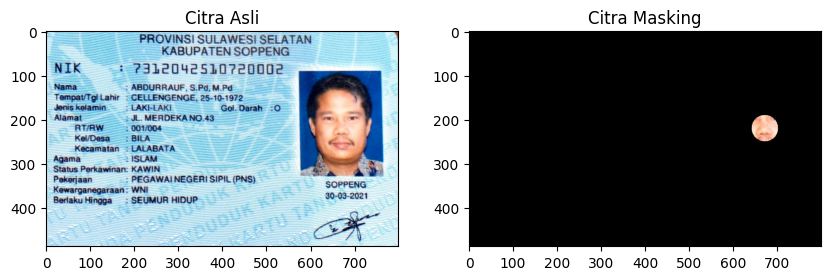

In [15]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 220), 30, 200, -1)
masked_image_nose = cv.bitwise_and(ktp, ktp, mask=mask)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(masked_image_nose)
ax[1].set_title('Citra Masking')

Text(0.5, 1.0, 'Citra Masking')

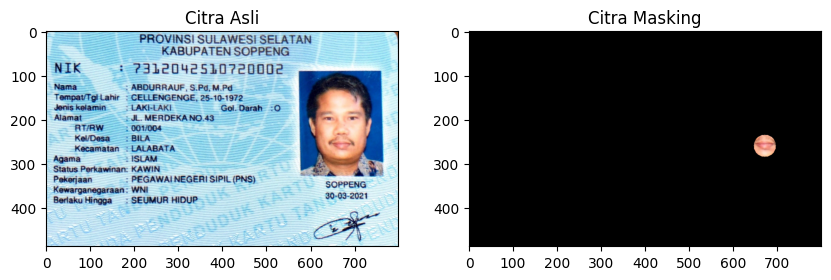

In [16]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 260), 25, 200, -1)
masked_image_mouth = cv.bitwise_and(ktp, ktp, mask=mask)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(masked_image_mouth)
ax[1].set_title('Citra Masking')

Text(0.5, 1.0, 'Citra Masking')

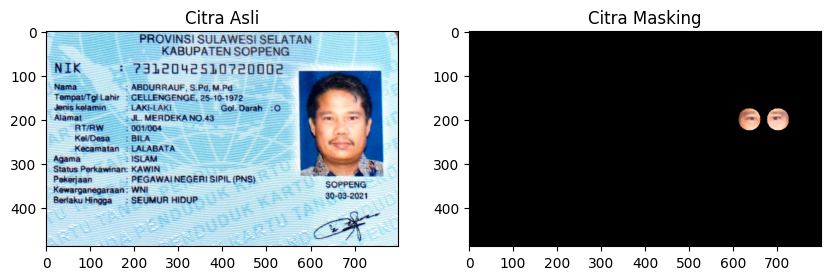

In [17]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (635, 200), 25, 200, -1)
cv.circle(mask, (700, 200), 25, 200, -1)
masked_image_eye = cv.bitwise_and(ktp, ktp, mask=mask)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(masked_image_eye)
ax[1].set_title('Citra Masking')

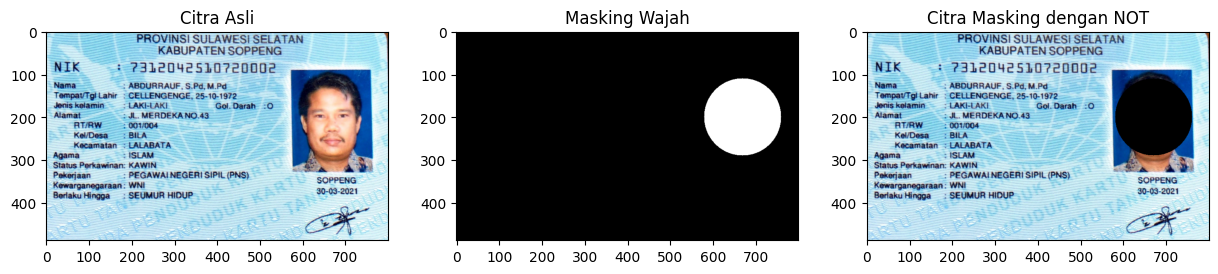

In [18]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 255, -1)

mask_not = cv.bitwise_not(mask)
masked_image_not_face = cv.bitwise_and(ktp, ktp, mask=mask_not)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Masking Wajah')

ax[2].imshow(masked_image_not_face)
ax[2].set_title('Citra Masking dengan NOT')

plt.show()

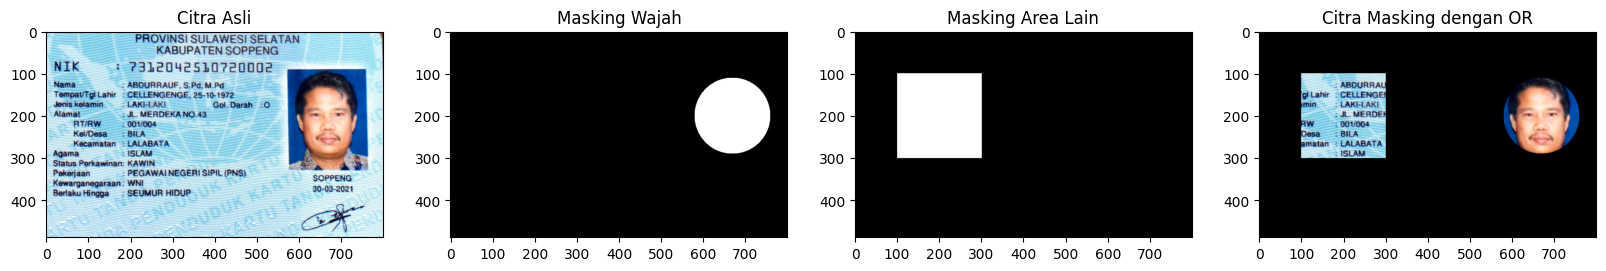

In [19]:
mask_face = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask_face, (670, 200), 90, 255, -1)

mask_rectangle = np.zeros(ktp.shape[:2], dtype="uint8")
cv.rectangle(mask_rectangle, (100, 100), (300, 300), 255, -1)

mask_combined = cv.bitwise_or(mask_face, mask_rectangle)

masked_image = cv.bitwise_and(ktp, ktp, mask=mask_combined)
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask_face, cmap='gray')
ax[1].set_title('Masking Wajah')

ax[2].imshow(mask_rectangle, cmap='gray')
ax[2].set_title('Masking Area Lain')

ax[3].imshow(masked_image)
ax[3].set_title('Citra Masking dengan OR')

plt.show()

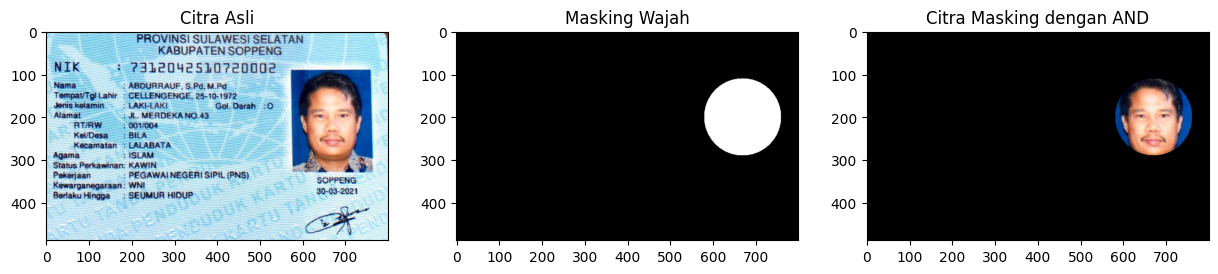

In [20]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 255, -1)

masked_image = cv.bitwise_and(ktp, ktp, mask=mask)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Masking Wajah')

ax[2].imshow(masked_image)
ax[2].set_title('Citra Masking dengan AND')

plt.show()

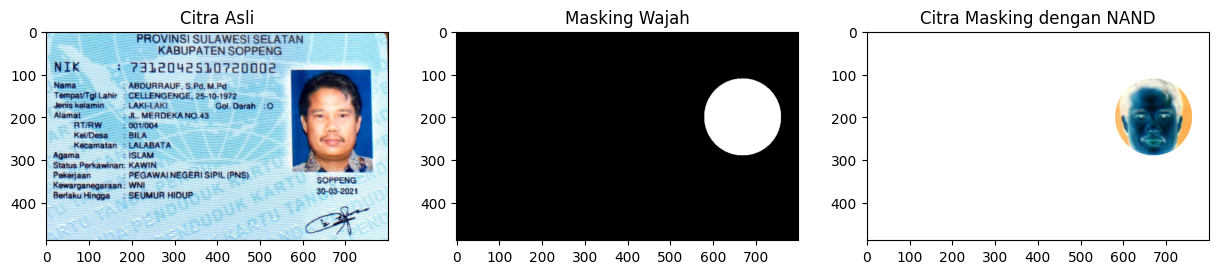

In [21]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 255, -1)

masked_image = cv.bitwise_and(ktp, ktp, mask=mask)

nand_masked_image = cv.bitwise_not(masked_image)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Masking Wajah')

ax[2].imshow(nand_masked_image)
ax[2].set_title('Citra Masking dengan NAND')

plt.show()

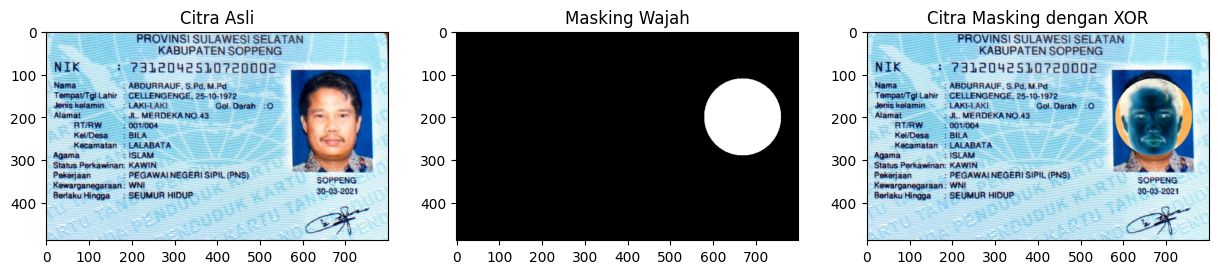

In [22]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 255, -1)

mask_colored = cv.merge([mask, mask, mask])

xor_masked_image = cv.bitwise_xor(ktp, mask_colored)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Masking Wajah')

ax[2].imshow(xor_masked_image)
ax[2].set_title('Citra Masking dengan XOR')

plt.show()

result
NOT operator: Changes the pixel value to its opposite. If a pixel is 0 (black), then the result will be 255 (white), and vice versa.

AND operator: Produces the same pixel value if both images have non-zero pixels. If one or both pixels are 0, then the result is also 0.

OR operator: Produces a non-zero value if one of the two input pixels has a non-zero value.

NAND operator: Produces the opposite of AND, where the result is only 0 if both pixels are 1.

XOR operator: Produces a value of 1 if the two pixels are different (one is 1, the other is 0), but will return 0 if they have the same value.